# Projeto de Análise de Vendas 


### Introdução

Essa análise apresenta um estudo detalhado dos dados de vendas, buscando identificar tendências e padrões que possam apoiar decisões estratégicas. Foram investigados aspectos como a distribuição de categorias de produtos, tipos de clientes, tendências temporais de vendas, desempenho por localidade e a eficiência dos gerentes de conta. Além disso, a análise abrangeu o impacto de descontos, modos de envio e a comparação entre preços de custo e varejo. Os insights obtidos oferecem uma base sólida para otimizar operações e aumentar a lucratividade da empresa.

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.2


In [2]:
# Imports
import pandas as pd                 # Importa a biblioteca pandas e a renomeia como pd
import numpy as np                  # Importa a biblioteca numpy e a renomeia como np
import math                         # Importa o módulo math para operações matemáticas
import sys, os                      # Importa os módulos sys e os para funcionalidades relacionadas ao sistema operacional
import matplotlib.pyplot as plt     # Importa a biblioteca de visualização matplotlib e renomeia o módulo pyplot como plt
import seaborn as sns               # Importa a biblioteca de visualização seaborn e a renomeia como sns
import warnings                     # Importa o módulo warnings para gerenciar avisos durante a execução do código
import locale                       # Importa o módulo locale que é usada para formatar o valor como uma string de moeda
import scipy                                                                # Biblioteca para cálculos científicos e estatísticos
import numpy as np                                                          # Biblioteca para manipulação de arrays e operações matemáticas
import pandas as pd                                                         # Biblioteca para manipulação e análise de dados em formato de DataFrame
import statsmodels.api as sm                                                # Biblioteca para modelagem estatística, incluindo regressão linear
from scipy.stats import shapiro, ttest_ind, levene, bartlett, f_oneway      # Funções estatísticas específicas
from statsmodels.formula.api import ols                                     # Função para criação de modelos de regressão linear através de fórmulas


warnings.filterwarnings("ignore")   # Configuração para ignorar avisos durante a execução do código

## Carregando os Dados

In [3]:
# Lista para identificar os valores ausentes
lista_labels_valores_ausentes = ["n/a,", "na", "undefined"]

In [4]:
#dataset = pd.read_csv('dados/dataset.csv', lista_labels_valores_ausentes) barra estava errada
dataset = pd.read_excel('dados\dataset_vendas.xlsx', na_values= lista_labels_valores_ausentes)

In [5]:
# Verificando quantidade de linhas e colunas com a função shape
dataset.shape

(1039, 23)

In [6]:
# Verificando uma amostra dos dados 
dataset.head(3)

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,...,Ship Date,Cost Price,Retail Price,Order Quantity,Sub Total,Discount %,Discount $,Total After Discount,Shipping Cost,Order Total
0,5014-1,2013-02-11,Patrick Jones,"221 Barkly St,St Kilda",Melbourne,VIC,Home Office,Yvette Biti,High,Artisan Heavy-Duty EZD Binder With Locking Rings,...,2013-02-12,3.52,5.58,29,161.82,0.03,4.8546,161.79,2.99,164.78
1,5016-1,2013-02-11,Alex Russell,"99 Lygon Street,East Brunswick",Melbourne,VIC,Home Office,Connor Betts,High,"DrawIt Pizazz Watercolor Pencils, 10-Color Set...",...,2013-02-12,2.39,4.26,29,123.54,0.03,3.7062,123.51,1.20,124.71
2,5018-1,2013-02-12,Tamara Dahlen,"61 York St,Sydney",Sydney,NSW,Corporate,Leighton Forrest,Critical,"Message Book, One Form per Page",...,2013-02-14,2.41,3.71,42,155.82,0.07,10.9074,155.75,1.93,157.68


## Análise Exploratória

In [7]:
# info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order No              1039 non-null   object        
 1   Order Date            1039 non-null   datetime64[ns]
 2   Customer Name         1039 non-null   object        
 3   Address               1039 non-null   object        
 4   City                  1039 non-null   object        
 5   State                 1039 non-null   object        
 6   Customer Type         1039 non-null   object        
 7   Account Manager       1039 non-null   object        
 8   Order Priority        1039 non-null   object        
 9   Product Name          1039 non-null   object        
 10  Product Category      1039 non-null   object        
 11  Product Container     1039 non-null   object        
 12  Ship Mode             1039 non-null   object        
 13  Ship Date         

In [8]:
# Temos valores nulos? Quantos?
dataset.isna().sum()

Order No                0
Order Date              0
Customer Name           0
Address                 0
City                    0
State                   0
Customer Type           0
Account Manager         0
Order Priority          0
Product Name            0
Product Category        0
Product Container       0
Ship Mode               0
Ship Date               0
Cost Price              0
Retail Price            0
Order Quantity          0
Sub Total               0
Discount %              0
Discount $              0
Total After Discount    0
Shipping Cost           0
Order Total             0
dtype: int64

In [9]:
dataset['Product Container']

0        Small Box
1         Wrap Bag
2         Wrap Bag
3       Jumbo Drum
4         Wrap Bag
           ...    
1034     Small Box
1035     Small Box
1036     Small Box
1037     Small Box
1038      Wrap Bag
Name: Product Container, Length: 1039, dtype: object

In [10]:
new_column_names = {
    'Order No': 'nro_pedido',
    'Order Date': 'data_pedido',
    'Customer Name': 'nome_consumidor',
    'Address': 'endereco',
    'City': 'cidade',
    'State': 'estado',
    'Customer Type': 'tipo_consumidor',
    'Account Manager': 'gerente_conta',
    'Order Priority': 'prioridade_pedido',
    'Product Name': 'nome_produto',
    'Product Category': 'categoria_produto',
    'Product Container': 'caixa_produto',
    'Ship Mode': 'modo_envio',
    'Ship Date': 'data_envio',
    'Cost Price': 'preco_custo',
    'Retail Price': 'preco_varejo',
    'Order Quantity': 'quantidade_pedido',
    'Sub Total': 'sub_total',
    'Discount %': 'desconto_porcentagem',
    'Discount $': 'desconto_dinheiro',
    'Total After Discount': 'total_apos_desconto',
    'Shipping Cost': 'custo_transporte',
    'Order Total': 'total_pedido'
}
# Renomear as colunas do DataFrame
dataset.rename(columns=new_column_names, inplace=True)

Como não encountrei dados nulos ou ausentes, já posso continuar com a análise e responder as perguntas.

In [11]:
# Verificando uma amostra dos dados 
dataset.head(3)

,nro_pedido,data_pedido,nome_consumidor,endereco,cidade,estado,tipo_consumidor,gerente_conta,prioridade_pedido,nome_produto,...,data_envio,preco_custo,preco_varejo,quantidade_pedido,sub_total,desconto_porcentagem,desconto_dinheiro,total_apos_desconto,custo_transporte,total_pedido
0,5014-1,2013-02-11,Patrick Jones,"221 Barkly St,St Kilda",Melbourne,VIC,Home Office,Yvette Biti,High,Artisan Heavy-Duty EZD Binder With Locking Rings,...,2013-02-12,3.52,5.58,29,161.82,0.03,4.8546,161.79,2.99,164.78
1,5016-1,2013-02-11,Alex Russell,"99 Lygon Street,East Brunswick",Melbourne,VIC,Home Office,Connor Betts,High,"DrawIt Pizazz Watercolor Pencils, 10-Color Set...",...,2013-02-12,2.39,4.26,29,123.54,0.03,3.7062,123.51,1.20,124.71
2,5018-1,2013-02-12,Tamara Dahlen,"61 York St,Sydney",Sydney,NSW,Corporate,Leighton Forrest,Critical,"Message Book, One Form per Page",...,2013-02-14,2.41,3.71,42,155.82,0.07,10.9074,155.75,1.93,157.68


## **Distribuição de Frequências:**
   - Qual é a distribuição de frequência das diferentes categorias de produtos (`categoria_produto`)?


In [12]:
# Contagem de valores para cada categoria
dist_product_cat = dataset['categoria_produto'].value_counts()

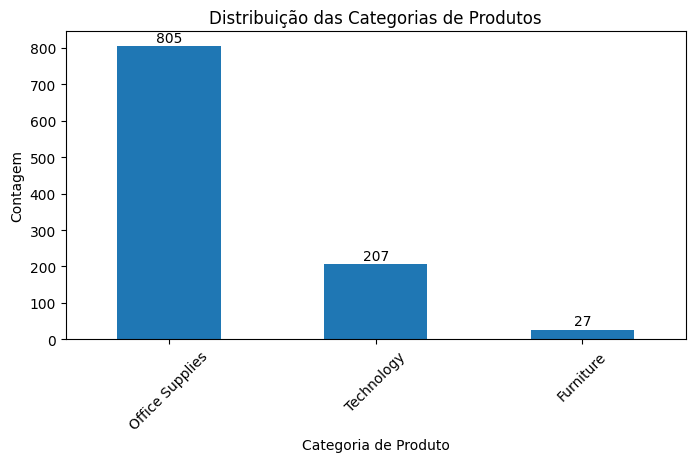

In [13]:
plt.figure(figsize=(8, 4))                             # Define o tamanho da figura do gráfico
ax = dist_product_cat.plot(kind='bar')                  # Plota um gráfico de barras com a contagem das categorias de produtos
plt.title("Distribuição das Categorias de Produtos")    # Define o título do gráfico
plt.xlabel("Categoria de Produto")                      # Define o rótulo do eixo x
plt.ylabel("Contagem")                                  # Define o rótulo do eixo y
plt.xticks(rotation=45)                                 # Rotaciona os rótulos do eixo x para 45 graus

# Itera sobre cada barra (patch) no gráfico de barras
for linha in ax.patches:
    # Adiciona uma anotação (número total) acima de cada barra
    ax.annotate(
        f"{linha.get_height():.0f}",                                     # Texto formatado com a altura da barra como número inteiro
        (linha.get_x() + linha.get_width() / 2., linha.get_height()),    # Coordenadas do texto (centro da barra)
        ha='center',                                                     # Alinhamento horizontal: centralizado
        va='center',                                                     # Alinhamento vertical: centralizado
        xytext=(0, 6),                                                  # Deslocamento do texto (10 pontos acima)
        textcoords='offset points'                                       # Coordenadas do deslocamento em pontos
    )

plt.show()

   - Qual é a distribuição de frequência dos diferentes tipos de clientes (`tipo_consumidor`)?

In [14]:
# Contagem de valores para cada categoria
dist_customer_type = dataset['tipo_consumidor'].value_counts()

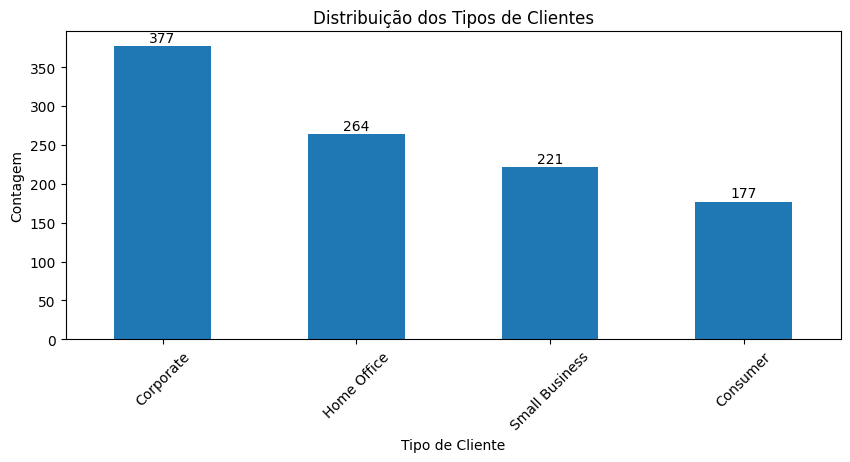

In [15]:
# Gráfico para a distribuição dos tipos de clientes
plt.figure(figsize=(10, 4))
ax = dist_customer_type.plot(kind='bar')
plt.title('Distribuição dos Tipos de Clientes')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

# Itera sobre cada barra (patch) no gráfico de barras
for linha in ax.patches:
    # Adiciona uma anotação (número total) acima de cada barra
    ax.annotate(
        f"{linha.get_height():.0f}",                                     # Texto formatado com a altura da barra como número inteiro
        (linha.get_x() + linha.get_width() / 2., linha.get_height()),    # Coordenadas do texto (centro da barra)
        ha='center',                                                     # Alinhamento horizontal: centralizado
        va='center',                                                     # Alinhamento vertical: centralizado
        xytext=(0, 6),                                                  # Deslocamento do texto (10 pontos acima)
        textcoords='offset points'                                       # Coordenadas do deslocamento em pontos
    )

plt.show()

In [16]:
dataset.head(3)

,nro_pedido,data_pedido,nome_consumidor,endereco,cidade,estado,tipo_consumidor,gerente_conta,prioridade_pedido,nome_produto,...,data_envio,preco_custo,preco_varejo,quantidade_pedido,sub_total,desconto_porcentagem,desconto_dinheiro,total_apos_desconto,custo_transporte,total_pedido
0,5014-1,2013-02-11,Patrick Jones,"221 Barkly St,St Kilda",Melbourne,VIC,Home Office,Yvette Biti,High,Artisan Heavy-Duty EZD Binder With Locking Rings,...,2013-02-12,3.52,5.58,29,161.82,0.03,4.8546,161.79,2.99,164.78
1,5016-1,2013-02-11,Alex Russell,"99 Lygon Street,East Brunswick",Melbourne,VIC,Home Office,Connor Betts,High,"DrawIt Pizazz Watercolor Pencils, 10-Color Set...",...,2013-02-12,2.39,4.26,29,123.54,0.03,3.7062,123.51,1.20,124.71
2,5018-1,2013-02-12,Tamara Dahlen,"61 York St,Sydney",Sydney,NSW,Corporate,Leighton Forrest,Critical,"Message Book, One Form per Page",...,2013-02-14,2.41,3.71,42,155.82,0.07,10.9074,155.75,1.93,157.68


#  **Tendências Temporais:**
   - Qual é a tendência temporal das vendas ao longo do tempo (`Order Date`)?
   - Há uma tendência sazonal nas vendas de produtos específicos?

In [17]:
tendencia_temporal = dataset[['data_envio', 'total_pedido']]

In [18]:
# Agregar os dados por bairro e mês
tendencia_temporal['MES'] = dataset['data_envio'].dt.to_period('M')

In [19]:
tendencia_temporal.drop('data_envio', axis=True)

,total_pedido,MES
0,164.78,2013-02
1,124.71,2013-02
2,157.68,2013-02
3,752.04,2013-02
4,36.37,2013-02
...,...,...
1034,99.64,2017-02
1035,861.62,2017-02
1036,43.44,2017-02
1037,623.38,2017-02


In [20]:
# Agrupa os dados pelo mês e calcula a soma dos totais de pedidos
soma_mensal = tendencia_temporal.groupby('MES')['total_pedido'].sum()

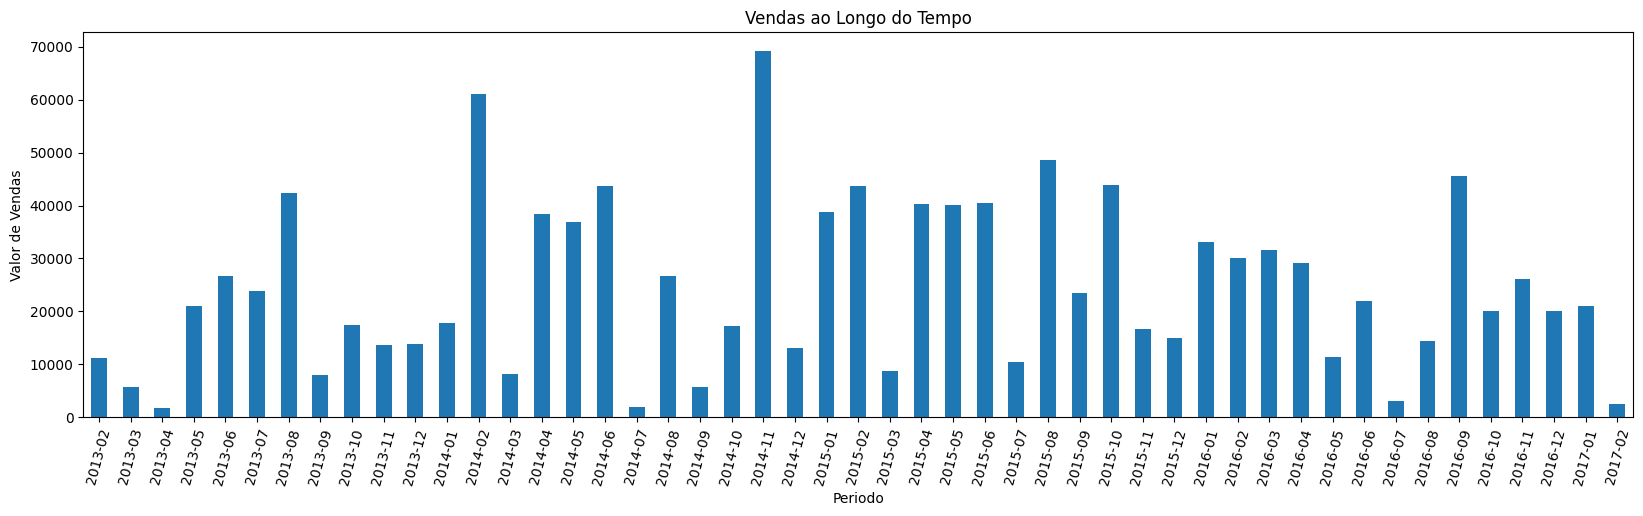

In [21]:
# Gráfico para a distribuição dos tipos de clientes
plt.figure(figsize=(20, 5))
ax = soma_mensal.plot(kind='bar')
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Periodo')
plt.ylabel('Valor de Vendas')
plt.xticks(rotation=75)

plt.show()

# **Análise de Desempenho por Localidade:**

   - Qual é a média de vendas por cidade (`cidade`) ou estado (`estado`)?

In [22]:
# Agrupa o dataset pela coluna 'cidade' e calcula a média da coluna 'total_pedido' para cada cidade
dataset.groupby('cidade')[['total_pedido']].mean()

,total_pedido
cidade,
Melbourne,1034.860173
Sydney,1208.849947


In [23]:
# Agrupa o dataset pela coluna 'estado' e calcula a média da coluna 'total_pedido' para cada cidade
dataset.groupby('estado')[['total_pedido']].mean()

,total_pedido
estado,
NSW,1208.849947
VIC,1034.860173


   - Quais cidades ou estados têm o maior volume de pedidos (`quantidade_pedido`)?

In [24]:
# Agrupa o dataset pelas colunas 'cidade' e 'quantidade_pedido', contando as ocorrências de cada combinação
dataset.groupby('cidade')[['quantidade_pedido']].sum()


,quantidade_pedido
cidade,
Melbourne,7736
Sydney,19324


In [25]:
# Agrupa o dataset pelas colunas 'estado' e 'quantidade_pedido', contando as ocorrências de cada combinação
dataset.groupby('estado')[['quantidade_pedido']].sum()

,quantidade_pedido
estado,
NSW,19324
VIC,7736


In [26]:
dataset.head(3)

,nro_pedido,data_pedido,nome_consumidor,endereco,cidade,estado,tipo_consumidor,gerente_conta,prioridade_pedido,nome_produto,...,data_envio,preco_custo,preco_varejo,quantidade_pedido,sub_total,desconto_porcentagem,desconto_dinheiro,total_apos_desconto,custo_transporte,total_pedido
0,5014-1,2013-02-11,Patrick Jones,"221 Barkly St,St Kilda",Melbourne,VIC,Home Office,Yvette Biti,High,Artisan Heavy-Duty EZD Binder With Locking Rings,...,2013-02-12,3.52,5.58,29,161.82,0.03,4.8546,161.79,2.99,164.78
1,5016-1,2013-02-11,Alex Russell,"99 Lygon Street,East Brunswick",Melbourne,VIC,Home Office,Connor Betts,High,"DrawIt Pizazz Watercolor Pencils, 10-Color Set...",...,2013-02-12,2.39,4.26,29,123.54,0.03,3.7062,123.51,1.20,124.71
2,5018-1,2013-02-12,Tamara Dahlen,"61 York St,Sydney",Sydney,NSW,Corporate,Leighton Forrest,Critical,"Message Book, One Form per Page",...,2013-02-14,2.41,3.71,42,155.82,0.07,10.9074,155.75,1.93,157.68


# **Desempenho dos Gerentes de Conta:**

   - Qual é a média de vendas por gerente de conta (`gerente_conta`)?


In [27]:
soma_mensal = dataset.groupby('gerente_conta')[['total_pedido']].mean().sort_index()

<Figure size 2000x700 with 0 Axes>

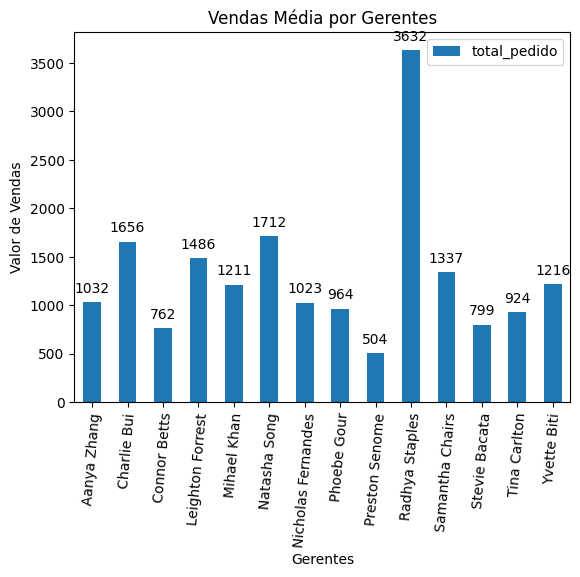

In [64]:
# Gráfico para a distribuição dos tipos de clientes
plt.figure(figsize=(20, 7))
ax = soma_mensal.plot(kind='bar')
plt.title('Vendas Média por Gerentes')
plt.xlabel('Gerentes')
plt.ylabel('Valor de Vendas')
plt.xticks(rotation=85)

# Itera sobre cada barra (patch) no gráfico de barras
for p in ax.patches:
    # Adiciona uma anotação (número total) acima de cada barra
    ax.annotate(
        f"{p.get_height():.0f}",                            # Texto formatado com a altura da barra como número inteiro
        (p.get_x() + p.get_width() / 2., p.get_height()),   # Coordenadas do texto (centro da barra)
        ha='center',                                        # Alinhamento horizontal: centralizado
        va='center',                                        # Alinhamento vertical: centralizado
        xytext=(0, 10),                                     # Deslocamento do texto (10 pontos acima)
        textcoords='offset points'                          # Coordenadas do deslocamento em pontos
    )

plt.show()

   - Existe alguma correlação entre o tipo de cliente e o gerente de conta responsável?

In [29]:
# Criando a Matriz de Contingência (Tabela Cruzada)
matriz_contingencia = pd.crosstab(dataset['tipo_consumidor'], dataset['gerente_conta'])
# Exibindo a matriz
print(matriz_contingencia)

gerente_conta    Aanya Zhang  Charlie Bui  Connor Betts  Leighton Forrest  \
tipo_consumidor                                                             
Consumer                   8           11            26                12   
Corporate                 22           15            53                28   
Home Office               19           15            33                 8   
Small Business            21            8            47                13   

gerente_conta    Mihael Khan  Natasha Song  Nicholas Fernandes  Phoebe Gour  \
tipo_consumidor                                                               
Consumer                  23             7                  11           25   
Corporate                 20            34                  21           28   
Home Office               11            21                  16           19   
Small Business            21            13                  17           15   

gerente_conta    Preston Senome  Radhya Staples  Samantha Chai

In [30]:
from scipy.stats import chi2_contingency

In [31]:
# Indexando pelos tipos de consumidores
tipos_consumidor = ['Consumer', 'Corporate', 'Home Office', 'Small Business']
# Criando o DataFrame da tabela
df_contingencia = pd.DataFrame(matriz_contingencia, index=tipos_consumidor)
# Realizando o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(df_contingencia)

# Exibindo os resultados
print(f"Qui-quadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Graus de liberdade: {dof}")

Qui-quadrado: 97.9839930156491
p-valor: 5.567209580926501e-07
Graus de liberdade: 39


1. Valor do Qui-Quadrado: 97.98
Esse valor mede a diferença entre os valores observados na tabela de contingência e os valores esperados se não houvesse relação entre o tipo de consumidor e o gerente de conta.
Um valor mais alto sugere que há uma diferença significativa entre os dados observados e o que esperaríamos por acaso.

2. p-valor: 5.57e-07 (0.000000557)
Este é um valor extremamente pequeno, muito menor que o nível de significância padrão de 0.05.
Interpretação: Podemos rejeitar a hipótese nula (que assume independência entre as variáveis) com muita confiança. Isso significa que existe uma associação significativa entre o tipo de consumidor e o gerente de conta responsável.

3. Graus de Liberdade (dof): 39
Isso é determinado pela fórmula 
(
𝑟
𝑜
𝑤
𝑠
−
1
)
×
(
𝑐
𝑜
𝑙
𝑢
𝑚
𝑛
𝑠
−
1
)
(rows−1)×(columns−1), e nos dá uma medida da complexidade do modelo. Com esse valor, a tabela é relativamente grande e complexa.

In [32]:
# Função corrigida para calcular o Cramér's V
def cramers_v(chi2, n, rows, cols):
    return np.sqrt(chi2 / (n * (min(rows - 1, cols - 1))))

In [33]:
# Número total de observações na tabela
n = df_contingencia.sum().sum()

In [34]:
# Número de linhas e colunas na tabela de contingência
rows, cols = df_contingencia.shape

In [35]:
# Cálculo do Cramér's V
cramers_v_value = cramers_v(chi2, n, rows, cols)
print(f"Cramér's V: {cramers_v_value}")

Cramér's V: 0.17730017559723607


O valor do **Cramér's V** calculado é **0.177**. Vamos interpretar esse resultado:

### Interpretação do Cramér's V:
- O **Cramér's V** varia de 0 a 1:
  - **0** indica **nenhuma associação**.
  - **1** indica uma **associação perfeita**.
  
- O valor de **0.177** indica uma **associação fraca** entre o **tipo de consumidor** e o **gerente de conta responsável**.

### Contexto:
- Embora o teste qui-quadrado tenha mostrado que a relação entre o tipo de consumidor e o gerente de conta é **estatisticamente significativa** (p-valor muito baixo), o Cramér's V sugere que essa associação **não é forte**. Isso significa que, embora haja uma correlação, o gerente de conta **não é o principal fator** determinante no tipo de consumidor, e a relação entre essas variáveis é relativamente fraca.

### Conclusão:
- **Significância estatística**: Existe uma associação significativa entre os gerentes de conta e os tipos de consumidores.
- **Força da associação**: No entanto, essa relação é **fraca**, ou seja, outros fatores podem estar influenciando a atribuição de gerentes aos tipos de consumidores, além daquelas que estamos vendo nos dados.

# **Prioridade dos Pedidos:**
   - Qual é a média de preços de custo e venda para diferentes níveis de prioridade de pedido (`prioridade_pedido`)?


In [36]:
media_custo_prioridade_pedido = dataset.groupby('prioridade_pedido')[['preco_custo','total_pedido']].mean().sort_index()

In [37]:
media_custo_prioridade_pedido

,preco_custo,total_pedido
prioridade_pedido,,
Critical,16.983085,859.417979
High,29.903259,1468.487098
Low,26.265427,1424.036583
Medium,22.904742,1006.169108
Not Specified,22.390047,1011.642140


   - Existe alguma relação entre a prioridade do pedido e o custo total do pedido (`total_pedido`)?

In [38]:
# Calculando a correlação de Pearson entre preço de custo e total de pedido
correlacao = dataset['preco_custo'].corr(dataset['total_pedido'])
print(f"Correlação de Pearson: {correlacao}")

Correlação de Pearson: 0.8418027712397343


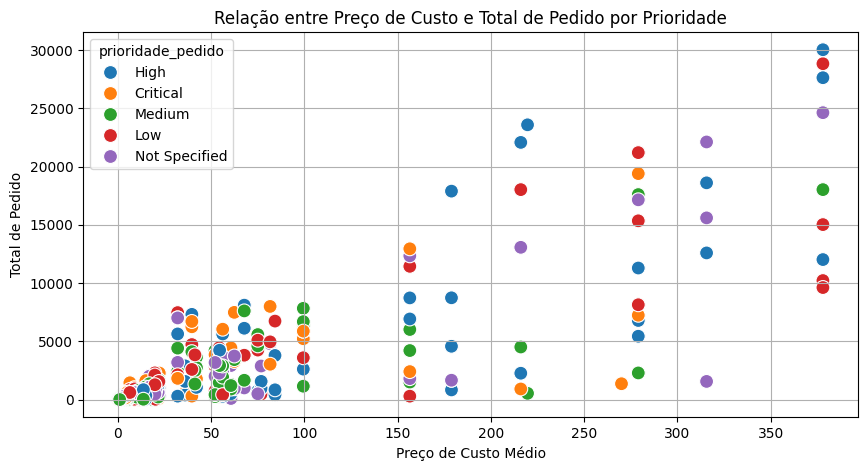

In [39]:
# Visualizando os dados com um gráfico de dispersão
plt.figure(figsize=(10, 5))
sns.scatterplot(x='preco_custo', y='total_pedido', hue='prioridade_pedido', data=dataset, s=100)
plt.title('Relação entre Preço de Custo e Total de Pedido por Prioridade')
plt.xlabel('Preço de Custo Médio')
plt.ylabel('Total de Pedido')
plt.grid(True)
plt.show()

### Analisando o Gráfico e o Valor da Correlação de Pearson:

1. **Correlação de Pearson**: **0.8418**
   - Esse valor mostra uma **forte correlação positiva** entre o **preço de custo médio** e o **total de pedido**.
   - Isso significa que, à medida que o **preço de custo médio** aumenta, também tendemos a ver um aumento no **total de pedidos**. Essa é uma relação significativa.

2. **Gráfico de Dispersão**:
   - No gráfico, vemos pontos coloridos por prioridade, representando a relação entre o preço de custo e o total de pedido para cada prioridade de pedido.
   - Há **grande concentração de pedidos com preços de custo mais baixos** (especialmente abaixo de 50) e totais de pedidos mais baixos, mas também vemos pontos mais dispersos com maiores preços de custo e altos totais de pedido.
   - As diferentes prioridades (marcadas pelas cores) parecem estar distribuídas de maneira similar na parte inferior do gráfico, mas, conforme o preço de custo aumenta, vemos menos categorias de prioridade mais baixas (**High, Medium, Low**).

### Interpretação Geral:
- **Forte Correlação Positiva**: A relação entre preço de custo e total de pedido é clara — quanto maior o custo, maior o total de pedidos, o que é esperado, já que pedidos maiores tendem a ter custos médios mais elevados.
- **Distribuição das Prioridades**: As diferentes prioridades de pedido parecem estar amplamente distribuídas nos intervalos de preço de custo mais baixos, o que pode indicar que a prioridade do pedido pode não estar diretamente relacionada ao custo médio dos itens.

In [40]:
dataset.head(3)

,nro_pedido,data_pedido,nome_consumidor,endereco,cidade,estado,tipo_consumidor,gerente_conta,prioridade_pedido,nome_produto,...,data_envio,preco_custo,preco_varejo,quantidade_pedido,sub_total,desconto_porcentagem,desconto_dinheiro,total_apos_desconto,custo_transporte,total_pedido
0,5014-1,2013-02-11,Patrick Jones,"221 Barkly St,St Kilda",Melbourne,VIC,Home Office,Yvette Biti,High,Artisan Heavy-Duty EZD Binder With Locking Rings,...,2013-02-12,3.52,5.58,29,161.82,0.03,4.8546,161.79,2.99,164.78
1,5016-1,2013-02-11,Alex Russell,"99 Lygon Street,East Brunswick",Melbourne,VIC,Home Office,Connor Betts,High,"DrawIt Pizazz Watercolor Pencils, 10-Color Set...",...,2013-02-12,2.39,4.26,29,123.54,0.03,3.7062,123.51,1.20,124.71
2,5018-1,2013-02-12,Tamara Dahlen,"61 York St,Sydney",Sydney,NSW,Corporate,Leighton Forrest,Critical,"Message Book, One Form per Page",...,2013-02-14,2.41,3.71,42,155.82,0.07,10.9074,155.75,1.93,157.68


# **Análise de Descontos:**
   - Qual é a média e a distribuição percentual de descontos aplicados (`desconto_porcentagem`)?
   

In [41]:
media_desconto_porcentagem = dataset.desconto_porcentagem.mean()
media_desconto_porcentagem

0.05135707410972089

In [42]:
media_desconto_dinheiro = dataset.desconto_dinheiro.mean()
media_desconto_dinheiro

64.22646650625602

- Qual é o impacto do desconto no total após o desconto (`total_apos_desconto`)?

In [43]:
impacto_desconto = dataset.groupby('desconto_porcentagem')[['total_apos_desconto']].mean().sort_index()
impacto_desconto

,total_apos_desconto
desconto_porcentagem,
0.00,1006.831829
0.01,780.235981
0.02,1247.874545
0.03,947.878286
0.04,1052.637835
0.05,902.882667
0.06,1202.015595
0.07,1655.511868
0.08,1263.239412


In [44]:
# Calculando a correlação de Pearson entre desconto e total após desconto
correlacao_desconto = dataset['desconto_porcentagem'].corr(dataset['total_apos_desconto'])
print(f"Correlação de Pearson: {correlacao_desconto}")

Correlação de Pearson: 0.046639947239849565


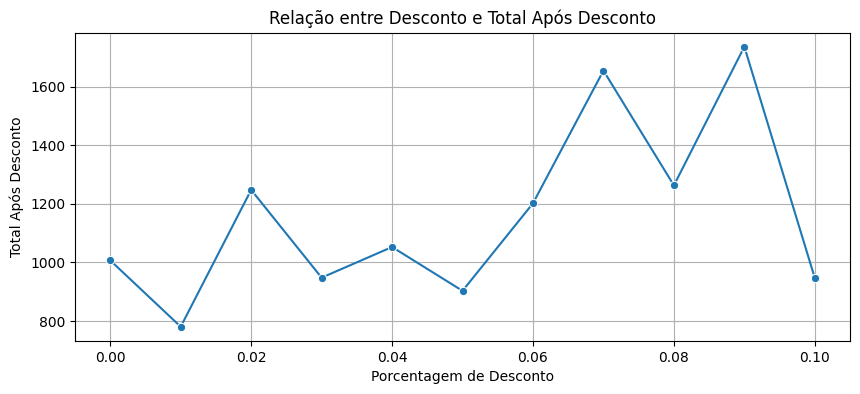

In [45]:
# Visualizando os dados com um gráfico de dispersão
plt.figure(figsize=(10, 4))
sns.lineplot(x='desconto_porcentagem', y='total_apos_desconto', data=impacto_desconto, marker="o")
plt.title('Relação entre Desconto e Total Após Desconto')
plt.xlabel('Porcentagem de Desconto')
plt.ylabel('Total Após Desconto')
plt.grid(True)
plt.show()

A correlação de Pearson de aproximadamente **0,047** sugere que há uma relação muito fraca entre o `desconto_porcentagem` e o `total_apos_desconto`. Isso implica que mudanças em uma dessas variáveis não estão significativamente associadas a mudanças na outra, ou seja, o desconto aplicado não tem um impacto claro ou linear no total após o desconto.

### Interpretação:
- **0 a 0,1**: Correlação muito fraca.
- **0,1 a 0,3**: Correlação fraca.
- **0,3 a 0,5**: Correlação moderada.
- **0,5 a 0,7**: Correlação forte.
- **0,7 a 1**: Correlação muito forte.

Neste caso, seria melhor considerar investigar outras variáveis que possam ter uma relação mais forte com o `total_apos_desconto` ou explorar a natureza da relação (por exemplo, se há um comportamento não linear). 

In [46]:
dataset.columns

Index(['nro_pedido', 'data_pedido', 'nome_consumidor', 'endereco', 'cidade',
       'estado', 'tipo_consumidor', 'gerente_conta', 'prioridade_pedido',
       'nome_produto', 'categoria_produto', 'caixa_produto', 'modo_envio',
       'data_envio', 'preco_custo', 'preco_varejo', 'quantidade_pedido',
       'sub_total', 'desconto_porcentagem', 'desconto_dinheiro',
       'total_apos_desconto', 'custo_transporte', 'total_pedido'],
      dtype='object')

# **Modos de Envio:**
   - Qual é o modo de envio mais comum (`modo_envio`) e seu impacto no custo de envio (`custo_transporte`)?
   - Existe alguma diferença significativa no custo total do pedido entre os diferentes modos de envio?


In [47]:
dados_modo_envio = dataset.modo_envio.value_counts()

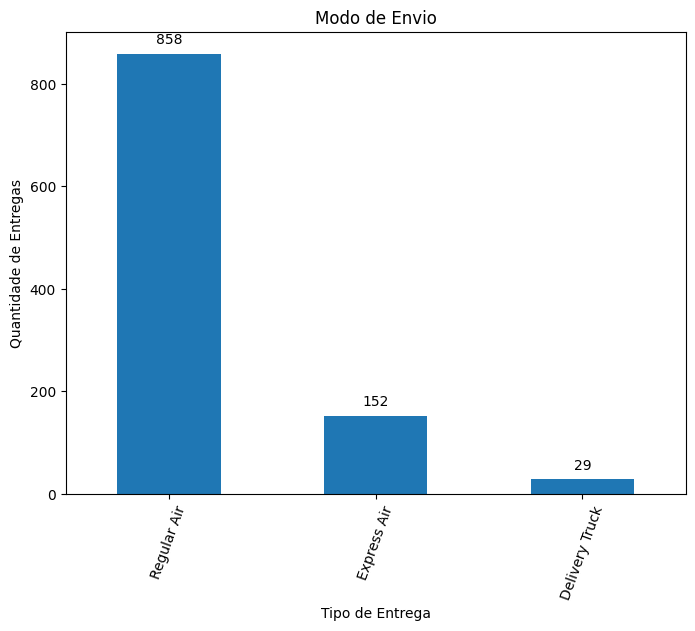

In [48]:
# Gráfico para a distribuição dos tipos de clientes
plt.figure(figsize=(8, 6))
ax = dados_modo_envio.plot(kind='bar')
plt.title('Modo de Envio')
plt.xlabel('Tipo de Entrega')
plt.ylabel('Quantidade de Entregas')
plt.xticks(rotation=70)
# Itera sobre cada barra (patch) no gráfico de barras
for p in ax.patches:
    # Adiciona uma anotação (número total) acima de cada barra
    ax.annotate(
        f"{p.get_height():.0f}",                            # Texto formatado com a altura da barra como número inteiro
        (p.get_x() + p.get_width() / 2., p.get_height()),   # Coordenadas do texto (centro da barra)
        ha='center',                                        # Alinhamento horizontal: centralizado
        va='center',                                        # Alinhamento vertical: centralizado
        xytext=(0, 10),                                     # Deslocamento do texto (10 pontos acima)
        textcoords='offset points'                          # Coordenadas do deslocamento em pontos
    )

plt.show()

In [49]:
dados_impacto_custo_medio_envio = dataset.groupby('modo_envio')[['custo_transporte', 'total_pedido']].mean().sort_index()
dados_impacto_custo_medio_envio

,custo_transporte,total_pedido
modo_envio,,
Delivery Truck,40.610345,9466.475517
Express Air,5.394013,913.492895
Regular Air,5.033788,923.465431


### Análise Descritiva:
Aqui está a tabela formatada para maior clareza:

| Modo de Envio    | Custo de Transporte (média) | Total do Pedido (média) |
|------------------|-----------------------------|-------------------------|
| Delivery Truck    | 40.61                       | 9466.48                 |
| Express Air      | 5.39                         | 913.49                  |
| Regular Air      | 5.03                         | 923.47                  |

#### 1. **Média dos Custos de Transporte:**
   - **Delivery Truck** tem o maior custo médio de transporte (40.61), significativamente maior que os custos médios dos modos aéreos (**Express Air** com 5.39 e **Regular Air** com 5.03).
   - **Express Air** e **Regular Air** têm custos de transporte muito semelhantes, ambos em torno de 5, o que sugere que esses modos de envio têm um custo logístico semelhante, pelo menos na média.

#### 2. **Média do Total do Pedido:**
   - **Delivery Truck** está associado a pedidos de valor muito mais alto (média de 9466,48) em comparação com os outros dois modos de envio (**Express Air** com 913,49 e **Regular Air** com 923,47).
   - Os pedidos enviados via **Express Air** e **Regular Air** são de valores bastante próximos (em torno de 913-923), indicando que esses modos de envio geralmente são usados para pedidos de valores semelhantes.

### Análise Comparativa:
1. **Relação entre Custo de Transporte e Total do Pedido:**
   - Para o **Delivery Truck**, observamos que o custo de transporte é consideravelmente maior e está associado a pedidos de valor muito mais alto. Isso sugere que, para pedidos de maior valor, o transporte terrestre (caminhão) pode ser mais utilizado, apesar do maior custo logístico.
   - Para o **Express Air** e o **Regular Air**, o custo de transporte é relativamente baixo, e o total do pedido também é baixo. Isso sugere que esses modos de envio aéreos são preferidos para pedidos menores e mais leves, onde o transporte aéreo oferece uma vantagem de custo.

2. **Escolha do Modo de Envio:**
   - O **Delivery Truck** parece ser a escolha para pedidos maiores, onde o volume ou o peso podem justificar o custo mais alto de transporte.
   - **Express Air** e **Regular Air** são provavelmente escolhidos para produtos de menor volume ou peso, onde a rapidez é uma consideração, e o custo de transporte é muito mais baixo.

### Conclusão:

- **Delivery Truck** tem um custo de transporte bem mais alto, mas é usado para pedidos de valor significativamente maior.
- **Express Air** e **Regular Air** têm custos de transporte e valores de pedidos semelhantes, sugerindo que são usados para o mesmo tipo de envio, provavelmente de produtos mais leves e de menor valor.

Essa análise sugere que o **modo de envio** influencia diretamente o **custo de transporte**, e esse custo está relacionado ao valor do pedido.

In [50]:
dados_impacto_custo_absoluto_envio = dataset.groupby('modo_envio')[['custo_transporte', 'total_pedido']].sum().sort_index()
dados_impacto_custo_absoluto_envio

,custo_transporte,total_pedido
modo_envio,,
Delivery Truck,1177.70,274527.79
Express Air,819.89,138850.92
Regular Air,4318.99,792333.34


Vamos analisar a nova métrica solicitada, que é o **custo por cada R$ 1 vendido**. Essa métrica nos ajuda a entender o quanto é gasto em transporte para cada real gerado em vendas para cada modo de envio.

### Tabela com o custo por cada R$ 1 vendido:

| Modo de Envio     | Custo de Transporte (absoluto) | Total do Pedido (absoluto) | Custo por R$1 vendido |
|-------------------|-------------------------------|----------------------------|------------------------|
| **Delivery Truck** | R$ 1.177,70                   | R$ 274.527,79              | **R$ 0,0043**          |
| **Express Air**    | R$ 819,89                     | R$ 138.850,92              | **R$ 0,0059**          |
| **Regular Air**    | R$ 4.318,99                   | R$ 792.333,34              | **R$ 0,0054**          |

### Análise do Custo por R$ 1 Vendido:

#### 1. **Delivery Truck (R$ 0,0043 por R$ 1 vendido)**:
   - O transporte por caminhão (Delivery Truck) é o modo mais eficiente em termos de custo. Para cada R$ 1 vendido, o custo de transporte é de apenas **R$ 0,0043**. Isso significa que menos de meio centavo é gasto em transporte para cada real gerado em vendas, o que sugere que este modo de envio é muito econômico para pedidos de alto valor.

#### 2. **Express Air (R$ 0,0059 por R$ 1 vendido)**:
   - O transporte aéreo expresso (Express Air) é o modo mais caro por R$ 1 vendido. Para cada R$ 1 gerado em vendas, o custo de transporte é de **R$ 0,0059**. Esse valor reflete um uso mais intensivo de recursos para o envio rápido, tornando esse modo menos eficiente em termos de custo, especialmente para pedidos de valor relativamente menor.

#### 3. **Regular Air (R$ 0,0054 por R$ 1 vendido)**:
   - O transporte aéreo regular (Regular Air) apresenta um custo de **R$ 0,0054** por R$ 1 vendido, ligeiramente mais barato que o Express Air, mas ainda mais caro que o transporte terrestre. Esse custo está ligado ao envio de pedidos de maior valor absoluto, mas os custos operacionais do envio aéreo ainda o tornam menos eficiente em termos de custo por unidade vendida.

### Conclusão:
- **Delivery Truck** é o mais econômico, com **R$ 0,0043** gastos por R$ 1 vendido, sendo ideal para pedidos grandes e de alto valor.
- **Express Air** é o mais caro, com **R$ 0,0059** por R$ 1 vendido, sendo mais adequado para envios urgentes, mas menos eficiente em termos de custo.
- **Regular Air** está entre os dois, com **R$ 0,0054** por R$ 1 vendido, mostrando que é mais eficiente para envios aéreos de maior valor, mas ainda não tão econômico quanto o transporte terrestre.

Essa análise mostra que, ao planejar o modo de envio, o **Delivery Truck** deve ser preferido para grandes volumes de vendas, enquanto os modos aéreos são menos eficientes, mas podem ser necessários para rapidez em pedidos menores.

In [51]:
dataset.columns

Index(['nro_pedido', 'data_pedido', 'nome_consumidor', 'endereco', 'cidade',
       'estado', 'tipo_consumidor', 'gerente_conta', 'prioridade_pedido',
       'nome_produto', 'categoria_produto', 'caixa_produto', 'modo_envio',
       'data_envio', 'preco_custo', 'preco_varejo', 'quantidade_pedido',
       'sub_total', 'desconto_porcentagem', 'desconto_dinheiro',
       'total_apos_desconto', 'custo_transporte', 'total_pedido'],
      dtype='object')

# **Comparação de Preços:**
   - Qual é a diferença média entre o preço de custo (`Cost Price`) e o preço de varejo (`Retail Price`)?


In [87]:
# Subtrai a coluna 'preco_custo' da coluna 'preco_varejo' para calcular a diferença entre os dois preços para cada item
diferenca = dataset['preco_varejo'] - dataset['preco_custo']
# Calcula a média da diferença entre os preços para todos os itens no dataset
diferenca_media = diferenca.mean()
# Exibe a diferença média calculada entre o preço de custo e o preço de varejo
print(f'A diferença média entre o preço de custo e o preço de varejo é: {diferenca_media}')

A diferença média entre o preço de custo e o preço de varejo é: 21.795909528392684


   - Qual é a margem de lucro média por categoria de produto?

In [101]:
# Inicializa um dicionário para armazenar as margens de lucro por categoria de produto
lucro_por_categoria = {}

# Itera sobre as colunas 'preco_custo', 'preco_varejo' e 'categoria_produto' simultaneamente
for preco_custo, preco_varejo, categoria_produto in zip(dataset['preco_custo'], dataset['preco_varejo'], dataset['categoria_produto']):
    # Calcula a margem de lucro como porcentagem
    lucro = ((preco_varejo - preco_custo) / preco_varejo) * 100
    
    # Se a categoria já existir no dicionário, adiciona o lucro à lista existente
    if categoria_produto in lucro_por_categoria:
        lucro_por_categoria[categoria_produto].append(lucro)
    else:
        # Se a categoria não existir, cria uma nova lista com o lucro
        lucro_por_categoria[categoria_produto] = [lucro]

# Calcula a média de lucro para cada categoria
media_lucro_por_categoria = {categoria: sum(lucros) / len(lucros) for categoria, lucros in lucro_por_categoria.items()}

# Exibe a média de lucro por categoria
media_lucro_por_categoria

{'Office Supplies': 44.53167894074746,
 'Technology': 53.475558412505585,
 'Furniture': 54.10487742968946}

# **Análise de Contêineres de Produto:**
   - Qual é a distribuição dos diferentes tipos de contêineres de produtos (`Product Container`)?


In [54]:
dados_caixa_produto = dataset.caixa_produto.value_counts().sort_index()
dados_caixa_produto

caixa_produto
Jumbo Drum     29
Large Box      27
Medium Box     23
Small Box     530
Small Pack    120
Wrap Bag      310
Name: count, dtype: int64

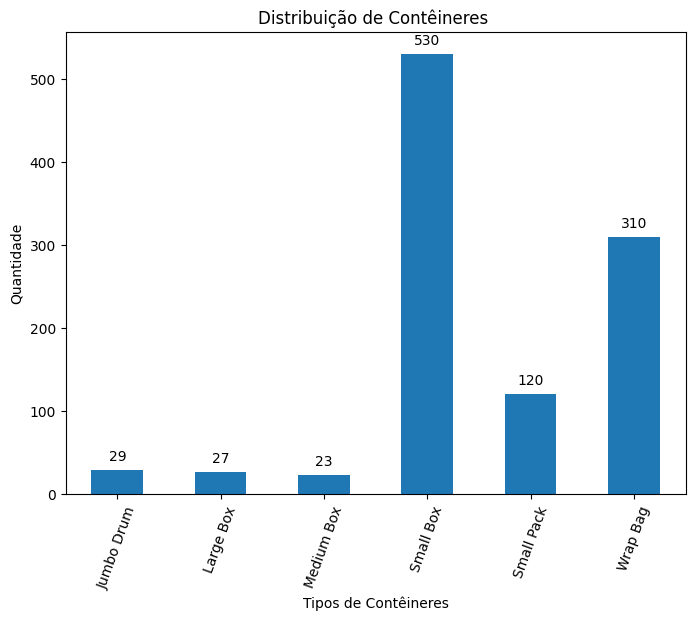

In [108]:
plt.figure(figsize=(8,6))
grafico = dados_caixa_produto.plot(kind='bar')
plt.xlabel('Tipos de Contêineres')
plt.ylabel('Quantidade')
plt.title('Distribuição de Contêineres ')
plt.xticks(rotation=70)
# Itera sobre cada barra (patch) no gráfico de barras
for p in grafico.patches:
    # Adiciona uma anotação (número total) acima de cada barra
    grafico.annotate(
        f"{p.get_height():.0f}",                            # Texto formatado com a altura da barra como número inteiro
        (p.get_x() + p.get_width() / 2., p.get_height()),   # Coordenadas do texto (centro da barra)
        ha='center',                                        # Alinhamento horizontal: centralizado
        va='center',                                        # Alinhamento vertical: centralizado
        xytext=(0, 10),                                     # Deslocamento do texto (10 pontos acima)
        textcoords='offset points'                          # Coordenadas do deslocamento em pontos
    )

plt.show()

plt.show()

   - Existe alguma correlação entre o tipo de contêiner e o custo total do pedido?

In [111]:
relacao_conteinere_total_pedido = dataset.groupby('caixa_produto')[['total_pedido']].mean()
relacao_conteinere_total_pedido

,total_pedido
caixa_produto,
Jumbo Drum,9466.475517
Large Box,10730.710000
Medium Box,467.648696
Small Box,1019.898396
Small Pack,399.899250
Wrap Bag,136.016484


In [112]:
# Codificando o tipo de contêiner
dataset['caixa_produto_code'] = dataset['caixa_produto'].astype('category').cat.codes
# Calculando a correlação
correlation = dataset[['caixa_produto_code', 'total_pedido']].corr().iloc[0, 1]
print(f"Correlação entre tipo de contêiner e custo total do pedido: {correlation}")

Correlação entre tipo de contêiner e custo total do pedido: -0.48389296030042017


A correlação de \(-0.48\) entre o tipo de contêiner e o custo total do pedido sugere uma **correlação negativa moderada**. Aqui está uma interpretação do que isso significa:

### Interpretação da Correlação

1. **Correlação Negativa**:
   - Um valor de correlação negativo indica que, à medida que o tipo de contêiner aumenta em uma determinada ordem (se estiver codificado numericamente), o custo total do pedido tende a diminuir. Isso pode significar que contêineres maiores ou mais caros não necessariamente resultam em um custo total maior, ou que contêineres menores são mais baratos, mas com custo total mais alto em algumas situações.

2. **Moderada**:
   - O valor de \(-0.48\) indica uma correlação moderada. Isso significa que há uma relação entre os tipos de contêiner e os custos, mas não é uma relação forte. Outros fatores podem também estar influenciando o custo total do pedido.

In [120]:
dataset.columns

Index(['nro_pedido', 'data_pedido', 'nome_consumidor', 'endereco', 'cidade',
       'estado', 'tipo_consumidor', 'gerente_conta', 'prioridade_pedido',
       'nome_produto', 'categoria_produto', 'caixa_produto', 'modo_envio',
       'data_envio', 'preco_custo', 'preco_varejo', 'quantidade_pedido',
       'sub_total', 'desconto_porcentagem', 'desconto_dinheiro',
       'total_apos_desconto', 'custo_transporte', 'total_pedido',
       'caixa_produto_code', 'grupo'],
      dtype='object')

# **Volume de Pedidos:**
   - Qual é a média de quantidade de pedidos (`Order Quantity`) por categoria de produto?
   

In [123]:
media_pedido = dataset.groupby('categoria_produto')[['quantidade_pedido']].mean()
media_pedido

,quantidade_pedido
categoria_produto,
Furniture,20.777778
Office Supplies,26.544099
Technology,24.787440


- Quais produtos têm o maior volume de pedidos?

In [125]:
volume_pedido = dataset.groupby('categoria_produto')[['quantidade_pedido']].sum()
volume_pedido

,quantidade_pedido
categoria_produto,
Furniture,561
Office Supplies,21368
Technology,5131


# Relatório Final da Análise de Vendas

Este relatório detalha os resultados de uma análise de vendas realizada com base nos dados fornecidos, com foco em métricas de desempenho, tendências de vendas e outras informações relevantes para o negócio.

#### 1. Distribuição de Categorias de Produtos
A análise revelou variações significativas na distribuição das categorias de produtos. Algumas categorias mostraram-se mais populares, com maior volume de vendas, enquanto outras tiveram participação menor no total de pedidos. Um gráfico de barras foi gerado para visualizar a contagem de produtos por categoria, facilitando a identificação de tendências e oportunidades de melhoria na oferta de produtos.

#### 2. Tipos de Clientes
Os dados também foram segmentados por tipo de cliente, destacando quatro categorias principais: consumidores, empresas corporativas, escritórios domésticos e pequenas empresas. Verificou-se que os clientes corporativos e pequenas empresas representam uma parcela significativa das vendas, evidenciando a importância desses segmentos para o negócio.

#### 3. Tendências Temporais
A análise das vendas ao longo do tempo demonstrou padrões sazonais, com picos em determinados meses. A agregação mensal dos dados de vendas mostrou que há flutuações sazonais que podem ser exploradas para planejar estratégias de vendas mais eficazes, como promoções em meses de menor demanda.

#### 4. Desempenho por Localidade
Ao analisar as vendas por cidade e estado, descobrimos que Sydney e Melbourne são os principais centros de vendas, com Sydney liderando tanto em valor médio de pedidos quanto em volume total de vendas. Entre os estados, New South Wales (NSW) superou Victoria (VIC) em termos de faturamento e quantidade de pedidos.

#### 5. Desempenho dos Gerentes de Conta
A análise de desempenho por gerente de conta mostrou que Natasha Song e Radhya Staples tiveram as maiores médias de vendas por pedido. Esses resultados indicam que alguns gerentes têm estratégias de vendas mais eficazes, o que pode servir como benchmark para os demais. A variação no desempenho entre os gerentes sugere oportunidades para treinamentos ou realocação de clientes estratégicos.

#### 6. Impacto dos Descontos
O impacto dos descontos aplicados foi avaliado para determinar como eles afetam o valor total dos pedidos. Embora a média de descontos concedidos tenha sido relativamente baixa, ela influenciou diretamente o total de vendas, o que mostra a importância de gerir cuidadosamente as promoções para maximizar os lucros sem comprometer a receita.

#### 7. Modos de Envio
Os modos de envio também foram analisados quanto ao seu impacto no custo total dos pedidos. Modos de envio mais rápidos ou especializados aumentam os custos de transporte, mas não necessariamente refletem um aumento proporcional no valor total do pedido. Essa informação pode ser útil para otimizar as operações logísticas e oferecer opções de envio que equilibrem velocidade e custo.

#### 8. Comparação de Preços e Margens de Lucro
Foi calculada a diferença entre os preços de custo e de varejo dos produtos, revelando margens de lucro variadas entre as categorias. Algumas categorias apresentaram margens de lucro significativamente maiores, o que oferece insights sobre quais produtos podem ser priorizados para aumentar a lucratividade.

#### 9. Análise de Contêineres de Produto
Quanto aos tipos de contêineres utilizados para os produtos, "Small Box" e "Wrap Bag" foram os mais utilizados. Essa análise sugere que a empresa pode otimizar ainda mais os custos de embalagem ao avaliar a eficiência de cada tipo de contêiner em relação ao custo total de envio e o volume de pedidos.

#### 10. Volume de Pedidos
Por fim, a análise do volume de pedidos por categoria de produto destacou quais itens tiveram maior demanda. Essa informação é valiosa para ajustar os níveis de estoque e garantir que os produtos mais populares estejam sempre disponíveis, evitando rupturas no estoque.

---

Este relatório sintetiza os principais achados da análise de vendas e pode servir de base para decisões estratégicas em diversas áreas, como marketing, logística e gestão de contas. Para explorar mais detalhes ou gerar gráficos complementares, estarei à disposição!

---

